**1. Dataset Overview:**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include channel dimension (required by CNN)
train_images = np.expand_dims(train_images, axis=-1)  # Shape (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, axis=-1)    # Shape (10000, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


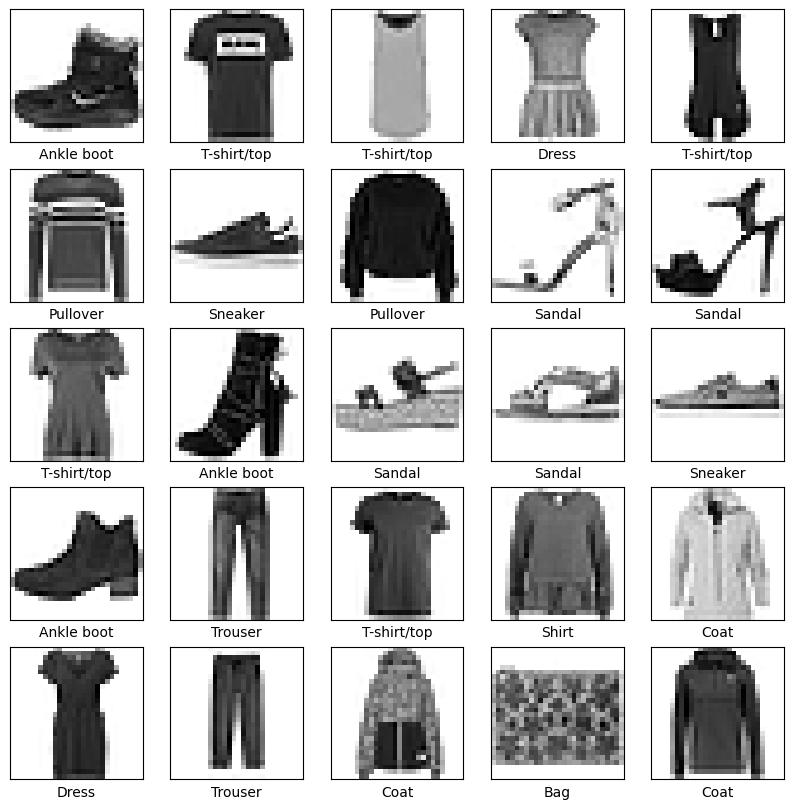

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


**2. Model Architecture:**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

**3. Model Training:(Already Training And Testing is Splitted)**

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 53ms/step - accuracy: 0.7535 - loss: 0.7083 - val_accuracy: 0.8519 - val_loss: 0.3946
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 48ms/step - accuracy: 0.8647 - loss: 0.3763 - val_accuracy: 0.8706 - val_loss: 0.3561
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 47ms/step - accuracy: 0.8826 - loss: 0.3247 - val_accuracy: 0.8812 - val_loss: 0.3264
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 48ms/step - accuracy: 0.8917 - loss: 0.2964 - val_accuracy: 0.8892 - val_loss: 0.3036
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 49ms/step - accuracy: 0.9009 - loss: 0.2671 - val_accuracy: 0.8855 - val_loss: 0.3263
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 49ms/step - accuracy: 0.9092 - loss: 0.2511 - val_accuracy: 0.8699 - val_loss: 0.3684
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9126 - loss: 0.2387 - val_accuracy: 0.8919 - val_loss: 0.3168
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 49ms/step - accuracy: 0

**4. Evaluation:**

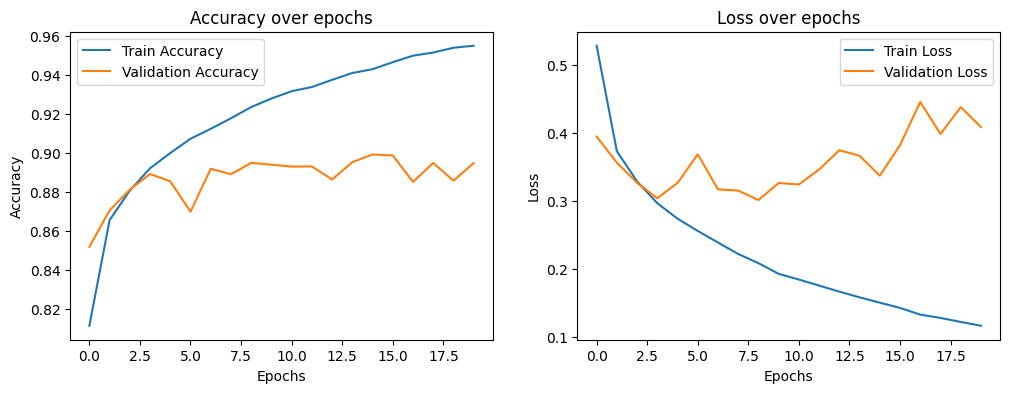

In [6]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))

# Training vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
